## Principal Component Analysis

In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
train <- read.csv('../data/train.csv')
validate <- read.csv('../data/validate.csv')

In [3]:
library(ggplot2)
library(lattice)

In [4]:
install.packages('reshape')
library(reshape)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
top_ten_df$X <- NULL
head(top_ten_df)
t(dim(top_ten_df))


train.BsmtQual.TA,train.BsmtQual.Gd,train.BsmtQual.Ex,train.TotalBsmtSF,train.BsmtFinSF1,train.BsmtQual.Fa,train.BsmtFinType1.GLQ,train.GarageType.Attchd,train.GarageType.Detchd,train.BsmtFinType1.ALQ,train.SalePrice
-0.8980076,1.1721126,-0.3001594,0.1084214,0.7205018,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,208500
-0.8980076,1.1721126,-0.3001594,0.1303386,0.6806608,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,223500
1.1128088,-0.8525724,-0.3001594,0.0706595,0.5941378,-0.1571639,-0.6305603,-1.2110638,1.6575461,2.364656,140000
-0.8980076,-0.8525724,3.3292676,0.3144655,0.7911581,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,307000
1.1128088,-0.8525724,-0.3001594,0.1407318,-1.4534423,-0.1571639,-0.6305603,-1.2110638,1.6575461,-0.422603,129900
1.1128088,-0.8525724,-0.3001594,0.1529360,0.7404323,-0.1571639,1.5847981,0.8251512,-0.6028857,-0.422603,118000


872,11


In [6]:
pca <- princomp(top_ten_df[,1:10], cor = T)

In [7]:
attributes(pca)

$names
[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"    

$class
[1] "princomp"

In [8]:
summary(pca)


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.6773975 1.3006295 1.1178035 1.0586737 1.0001966
Proportion of Variance 0.2813662 0.1691637 0.1249485 0.1120790 0.1000393
Cumulative Proportion  0.2813662 0.4505299 0.5754784 0.6875574 0.7875967
                           Comp.6     Comp.7     Comp.8     Comp.9      Comp.10
Standard deviation     0.94727631 0.85260094 0.50946586 0.48980121 1.764305e-02
Proportion of Variance 0.08973324 0.07269284 0.02595555 0.02399052 3.112773e-05
Cumulative Proportion  0.87732997 0.95002280 0.97597835 0.99996887 1.000000e+00

In [9]:
eigs <- pca$sdev^2
prop_explained_variance <- eigs/sum(eigs)

In [10]:
sd <- with(pca, unclass(sdev))
sd <- as.data.frame(sd)
# screeplot(prin_comp, npcs = min(10, length(prin_comp$sdev)), type=c("barplot", "lines"))

In [11]:
load <- with(pca, unclass(loadings))
load <- as.data.frame(t(load))

In [12]:
load$id <- c('Comp01',
             'Comp02',
             'Comp03',
             'Comp04',
             'Comp05',
             'Comp06',
             'Comp07',
             'Comp08',
             'Comp09',
             'Comp10')

In [13]:
melt_load <- melt(load, id.vars = "id")
head(melt_load)

id,variable,value
Comp01,train.BsmtQual.TA,0.40671570
Comp02,train.BsmtQual.TA,-0.46484641
Comp03,train.BsmtQual.TA,-0.04700892
Comp04,train.BsmtQual.TA,0.05092024
Comp05,train.BsmtQual.TA,-0.11162789
Comp06,train.BsmtQual.TA,0.33569226


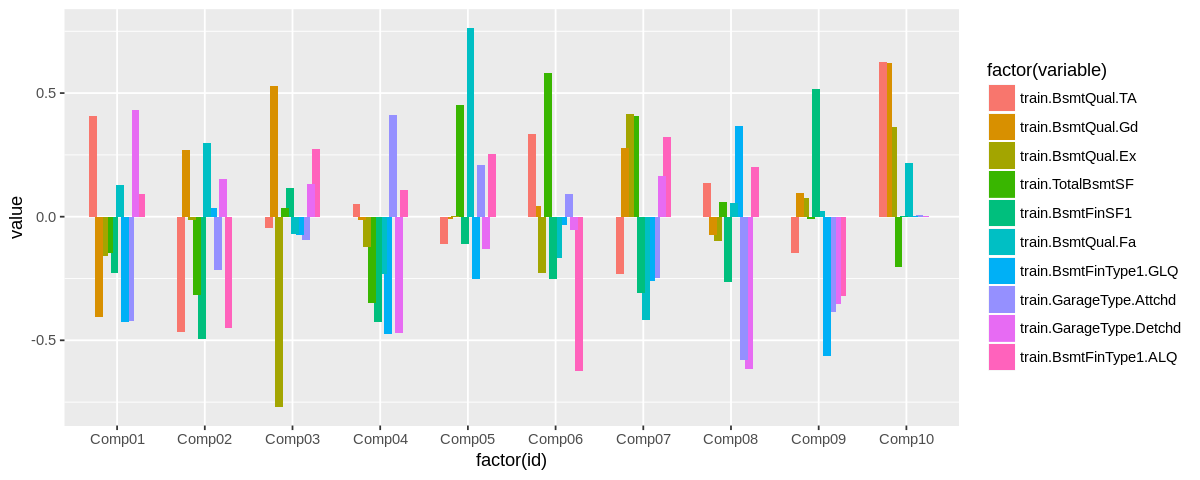

In [14]:
ggplot(melt_load, aes(x=factor(id))) +
    geom_bar(aes(y = value, 
                 fill = factor(variable)), 
             stat = "identity", 
             position = position_dodge(width = 0.6)) 
# +
#     geom_text(data = data.frame(prop_explained_variance),
#                 aes(x = prop_explained_variance, label = prop_explained_variance, y = 0.7)
# )
    

In [15]:
Component <- c('Comp01','Comp02','Comp03','Comp04', 'Comp05','Comp06','Comp07','Comp08','Comp09','Comp10')
PCA_component <- data.frame(Component)
PCA_component$PercentExplainedVariance <- prop_explained_variance*100
t(PCA_component)

Component,Comp01,Comp02,Comp03,Comp04,Comp05,Comp06,Comp07,Comp08,Comp09,Comp10
PercentExplainedVariance,28.136622267,16.916371453,12.494846593,11.207900846,10.003931605,8.973324010,7.269283622,2.595554614,2.399052217,0.003112773


#### PCA Explanation

The PCA shows the top 10 most important features, which are:
1. Basement Quality: Typical/Average
2. Basement Quality: Good
3. Basement Quality: Excellent
4. Total Basement Square Feet
5. Basement Finished Square Feet Type 1
6. Basement Quality: Fair
7. Basement Finished Type 1: Good Living Quarters
8. Garage Type: Attached
9. Garage Type: Detatched
10. Basement Finished Type 1: Average Living Quarters

As shown, most of the important features in determining the SalePrice are primarily related to the Basement conditions and Garage type.A

The first principle component suggests that a Typical/Average basement and detached garage might be useful predictors for lowering the cost of the Sale Price. These are inversely related to having Good basement, Good Living Quarters in the finished basement, and an attached garage would increase Sale Price. 

The second principle component suggest that a Typical/Average basement, the square footage of Type 1 finished basement and Average living quarters in finished basement area vary together.